# Ayudantía 8

Basado en https://www.kaggle.com/code/arthurtok/interactive-intro-to-dimensionality-reduction

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

## PCA

Algoritmo de reducción de dimensionalidad, inspirado en SVD

# Dataset

Información de imágenes sobre números. Cada pixel es un número entre $0$ y $1$, y se etiqueta el numero al que corresponde la imagen.

In [2]:
datos = pd.read_csv('numbers.csv')
datos.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(datos.shape)

(42000, 785)


In [4]:

numero = datos['label']

datos = datos.drop("label",axis=1)

Poseemos $42000$ imágenes de $28$ x $28$ pixeles, cada una representando un número del $0$ al $9$.

Observemos algunas:

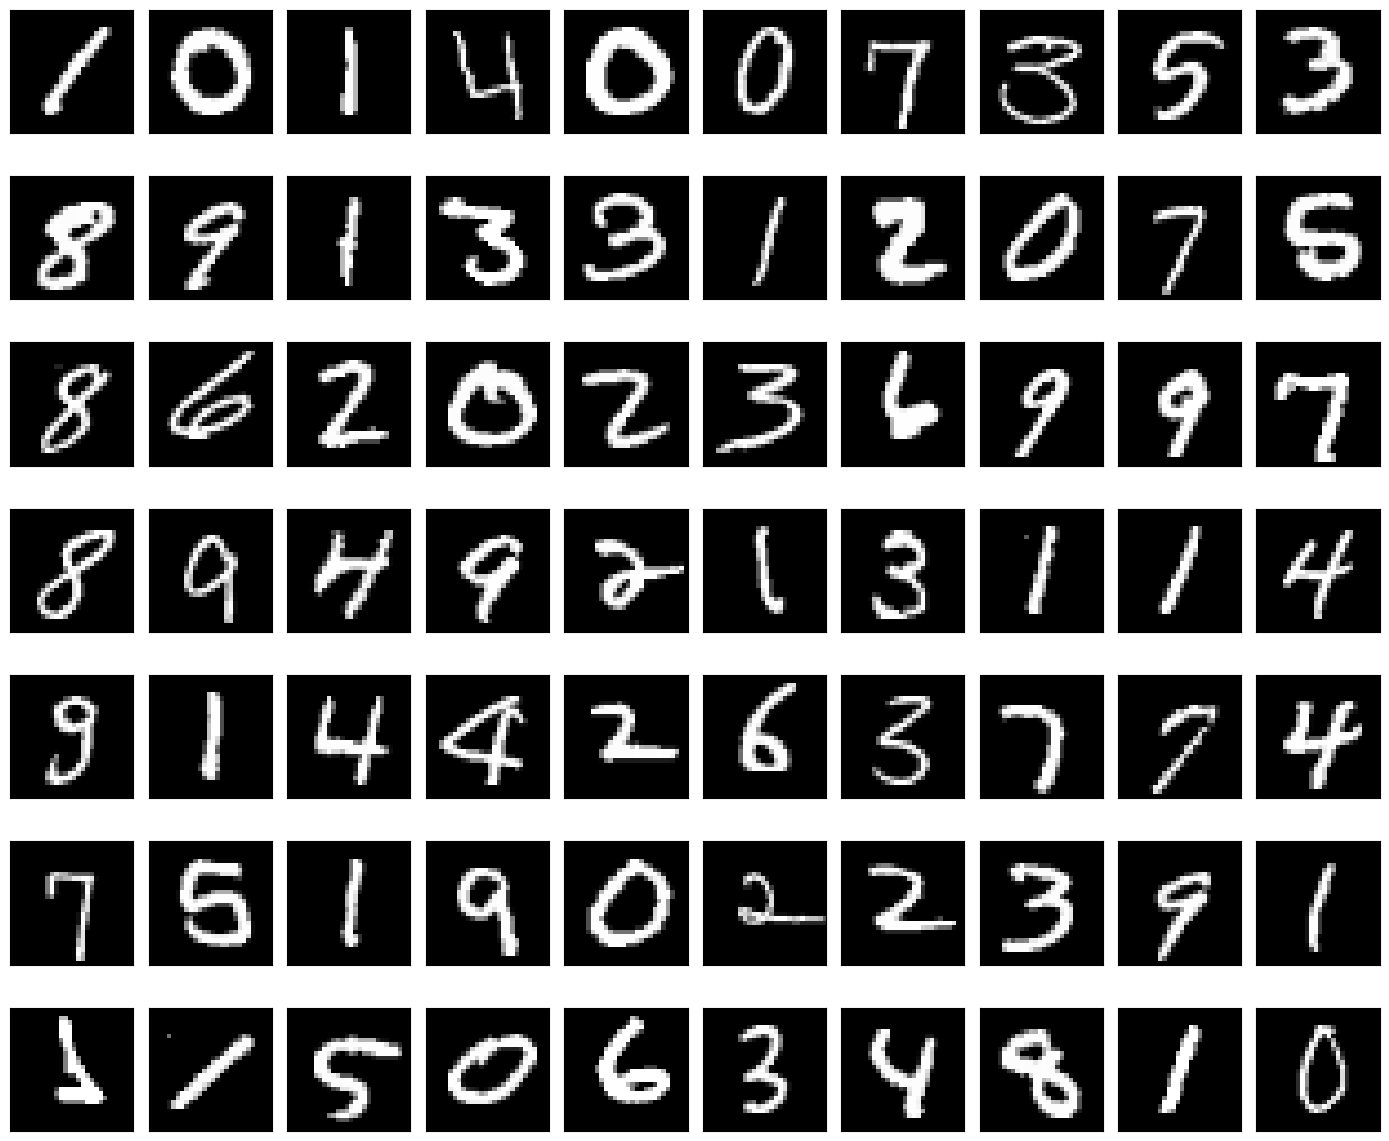

In [5]:

plt.figure(figsize=(14,12))
for digit_num in range(0,70):
    plt.subplot(7,10,digit_num+1)
    grid_data = datos.iloc[digit_num].to_numpy().reshape(28,28)  # transformamos de vector a array de 28*28
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

Podemos usar sklearn para realizar PCA. Veamos como lucen nuestras componentes principales:

Las imágenes tienen $28^2=784$ pixeles, por lo que viven en un espacio de dimensión muy alta. Podemos usar PCA para determinar cuales son las direcciones principales de las imágenes, y de esa manera reducir la dimensionalidad.

In [6]:

n_components = 30
pca = PCA(n_components=n_components).fit(datos.values)


sing_vectors = pca.components_

In [7]:
pca.explained_variance_

array([334780.59149447, 245885.06513832, 211051.62698822, 184726.37342815,
       168070.0015068 , 147773.28274113, 112534.6194561 ,  99315.43743438,
        95016.01443279,  80660.73018962,  72091.28110199,  70706.5372707 ,
        58466.04879377,  58130.66592179,  54296.21658765,  50934.7629866 ,
        45318.35868414,  44049.116531  ,  40795.34104755,  39585.80837026,
        36819.23036318,  34862.08544884,  33134.67771846,  31346.95102007,
        30481.38728976,  28802.83607504,  27875.73340707,  26694.78267731,
        25430.20202295,  23574.15544444])

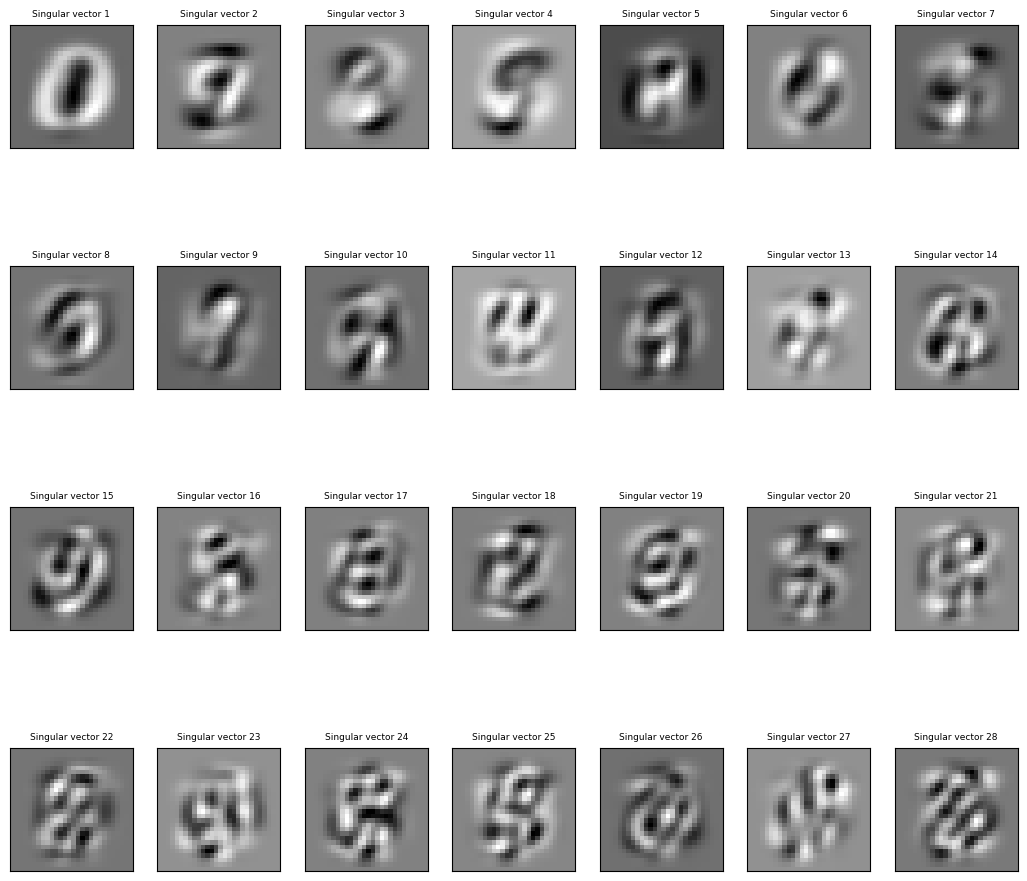

In [8]:
n_row = 4
n_col = 7


plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(sing_vectors[i].reshape(28,28), cmap="gray")
    title_text = 'Singular vector ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()

### Implementando PCA usando sklearn

In [18]:
N = 6000
from sklearn.decomposition import TruncatedSVD

# Tomando solo N valores para no tardar tanto
X = datos.values

# No es necesario centrar los valores, pues PCA lo hace por su cuenta
# El método TruncatedSVD de sklearn hace lo mismo que PCA, pero sin centrar
# Llamamos PCA 
pca = PCA(n_components=50)

# fit busca las direcciones principales (vectores singulares derechos)
# de la matriz de datos X_std
pca.fit(X)

# transform retorna la proyeccion de cada fila sobre el espacio generado por
# los vectores encontrados previamente
X_d = pca.transform(X)

In [19]:
X_d[0]

array([-661.59577975, -699.31132821,  183.28203965,  120.61139445,
        -81.08181051,  489.4618855 , -683.47083795,   85.55938646,
        348.54805237,  202.97854419, -364.55994702,   21.26575868,
        404.44146048,  -97.05254249,   61.83993921,  -86.78006566,
         17.65810879,  285.48470438,   18.82730222,  207.64283998,
         44.24347156,  221.89340892,   57.2270336 , -148.67582603,
         14.34480239,  -41.557504  , -333.72773067,  208.97539568,
         59.8136415 ,   84.55872086,    6.92120118,   -5.31269935,
        195.70653537,  -53.31233465,   -7.00249694, -146.85968393,
        -49.11940529,  -87.73240859, -161.51530854, -140.84683755,
        105.1884576 ,   19.95953937,   42.15619982,  -35.42448096,
       -203.28854621,   34.95470826,  -56.20013662,  -55.22349609,
        -67.91363469,   35.6183925 ])

### Visualización

Una utilidad de PCA es que permite visualizar los datos de muy buena manera:

C:\Users\pfrad\AppData\Local\Temp\ipykernel_5988\1221391263.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_d[:,0], X_d[:,1], c=numero, cmap=plt.cm.get_cmap('jet', 10), s=50)


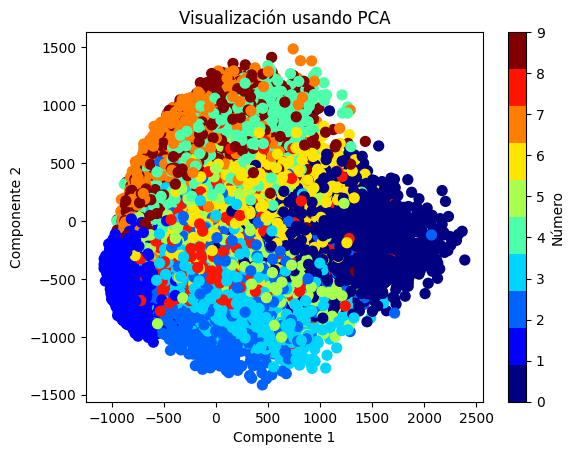

In [20]:
# ploteamos los puntos de acuerdo a las primeras dos componentes

colors = plt.cm.jet(np.linspace(0, 1, 10))


plt.scatter(X_d[:,0], X_d[:,1], c=numero, cmap=plt.cm.get_cmap('jet', 10), s=50)
plt.title("Visualización sobre componentes principales")

cbar = plt.colorbar()
cbar.set_label('Número')

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización usando PCA')


plt.show()


Se observa que los puntos que representan el mismo número tienden a estar cercanos entre si, formando "clusters".

Recordar que cada punto representa una imagen de 734 dimensiones, y reduciondo a tan solo dos se logra distinguir de manera razonable lo que representan.

### Reducción de información

Ahora, veamos cuanta información se pierde en cada imagen al considerar solo sus primeras componentes:

In [21]:
def get_projection(coef, component):
    proy = np.zeros(component[0].shape)
    for cant, vect in zip(coef, component):
        proy += cant * vect
    return proy

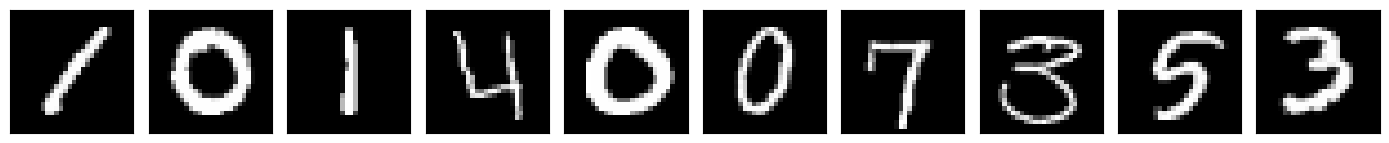

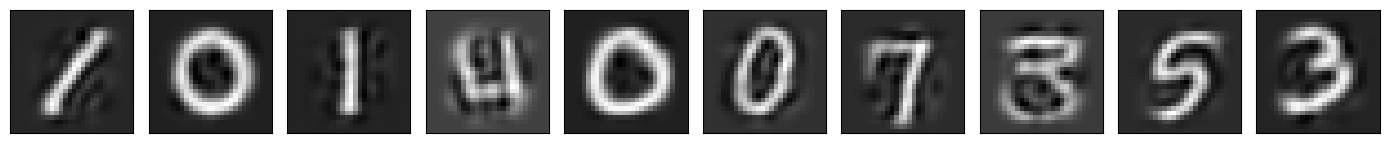

In [24]:
plt.figure(figsize=(14,12))
for digit_num in range(0,10):
    plt.subplot(1, 10, digit_num+1)
    grid_data = datos.iloc[digit_num].to_numpy().reshape(28,28)
    plt.imshow(grid_data, interpolation="none", cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()



plt.figure(figsize=(14,12))
for i in range(0,10):
    plt.subplot(1, 10, i + 1)
    proyeccion = get_projection(X_d[i], pca.components_)
    # descentramos los datos:
    proyeccion = proyeccion + pca.mean_
    grid_data = proyeccion.reshape(28,28)  
    plt.imshow(grid_data, interpolation="none", cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

Si bien se pierde bastante información, si se logra distinguir entre los números.